In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

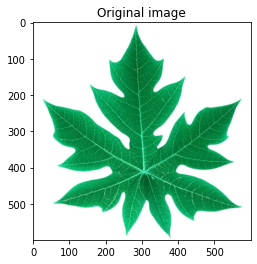

In [18]:
img = cv2.imread('daun-pepaya.jpg')
plt.title('Original image')
plt.imshow(img)

In [3]:
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

In [4]:
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

(Text(0.5, 1.0, 'Sobel XY'), <matplotlib.image.AxesImage at 0x2be432fffd0>)

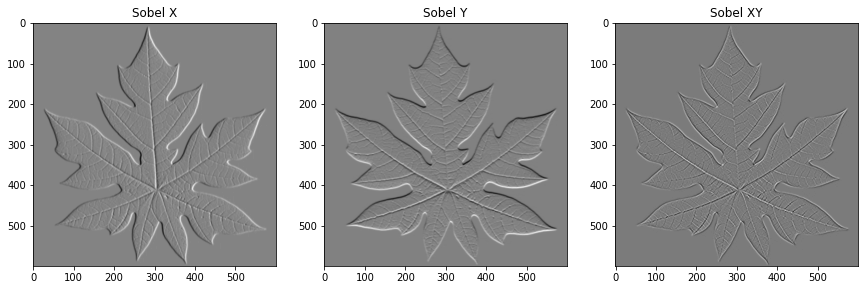

In [14]:
# Display Sobel Edge Detection Images
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.title('Sobel X'), plt.imshow(sobelx, cmap='gray')
plt.subplot(1,4,2)
plt.title('Sobel Y'), plt.imshow(sobely, cmap='gray')
plt.subplot(1,4,3)
plt.title('Sobel XY'), plt.imshow(sobelxy, cmap='gray')

In [6]:
#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_blur, -1, kernelx)
img_prewitty = cv2.filter2D(img_blur, -1, kernely)

(Text(0.5, 1.0, 'Prewitt XY'), <matplotlib.image.AxesImage at 0x2be43c831c0>)

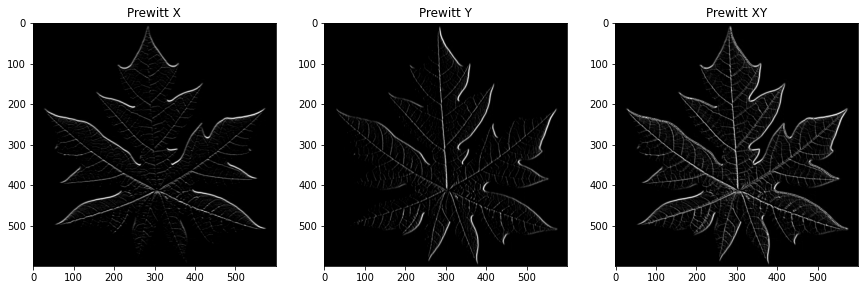

In [15]:
# Display Prewitt Edge Detection Images
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.title('Prewitt X'), plt.imshow(img_prewittx, cmap='gray')
plt.subplot(1,4,2)
plt.title('Prewitt Y'), plt.imshow(img_prewitty, cmap='gray')
plt.subplot(1,4,3)
plt.title('Prewitt XY'), plt.imshow(img_prewittx+img_prewitty, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Laplacian'), <matplotlib.image.AxesImage at 0x2be43d13430>)

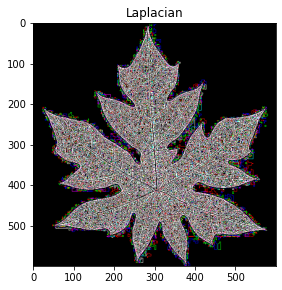

In [19]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)
# Display Laplacian Edge Detection Images
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.title('Laplacian'), plt.imshow(laplacian, cmap='gray')

In [9]:
roberts_cross_v = np.array( [[1, 0 ], [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ], [ -1, 0 ]] )

In [10]:
img = cv2.imread('daun-pepaya.jpg',0).astype('float64')
img /= 255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )

(Text(0.5, 1.0, 'Roberts XY'), <matplotlib.image.AxesImage at 0x2be3fd39fc0>)

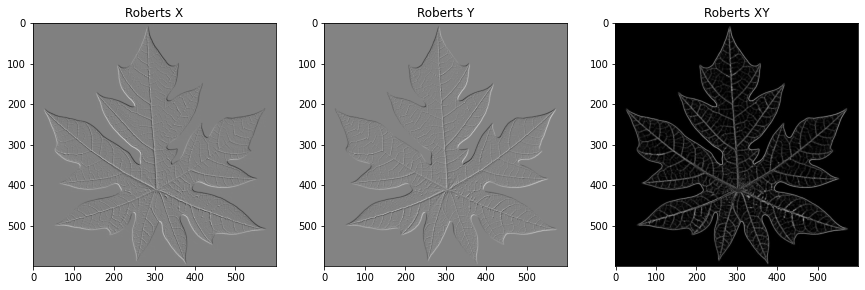

In [20]:
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255
# display roberts Edge Detection Images
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.title('Roberts X'), plt.imshow(horizontal, cmap='gray')
plt.subplot(1,4,2)
plt.title('Roberts Y'), plt.imshow(vertical, cmap='gray')
plt.subplot(1,4,3)
plt.title('Roberts XY'), plt.imshow(edged_img, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Roberts XY'), <matplotlib.image.AxesImage at 0x2be3fe09f60>)

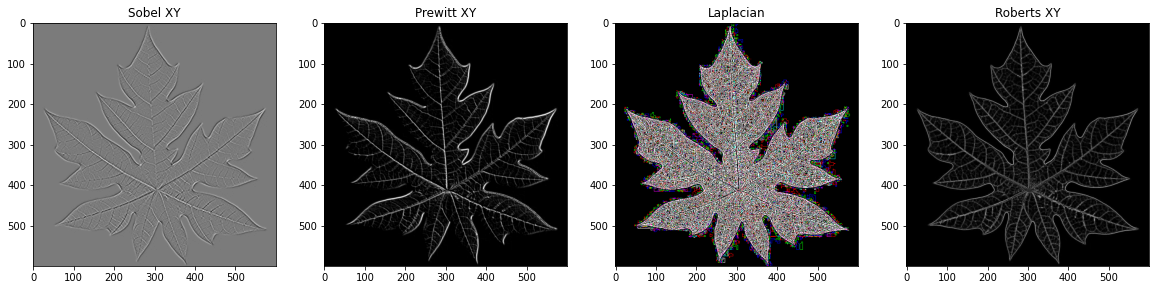

In [21]:
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.title('Sobel XY'), plt.imshow(sobelxy, cmap='gray')
plt.subplot(1,4,2)
plt.title('Prewitt XY'), plt.imshow(img_prewittx+img_prewitty, cmap='gray')
plt.subplot(1,4,3)
plt.title('Laplacian'), plt.imshow(laplacian, cmap='gray')
plt.subplot(1,4,4)
plt.title('Roberts XY'), plt.imshow(edged_img, cmap='gray')